In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving Libro2.csv to Libro2.csv


In [ ]:
import io
import pandas as pd
import numpy as np
df_MortandadGeneral=pd.read_csv(io.BytesIO(uploaded['Libro2.csv']),sep=';',encoding='latin')
df_MortandadGeneral





,Año,Semana,DiaInicio,DiaFinal,Total
0,2015,2015-1,1/01/2015,4/01/2015,3973
1,2015,2015-2,5/01/2015,11/01/2015,4052
2,2015,2015-3,12/01/2015,18/01/2015,3930
3,2015,2015-4,19/01/2015,25/01/2015,3727
4,2015,2015-5,26/01/2015,1/02/2015,3637
...,...,...,...,...,...
344,2021pr,2021pr-31,2/08/2021,8/08/2021,5613
345,2021pr,2021pr-32,9/08/2021,15/08/2021,5198
346,2021pr,2021pr-33,16/08/2021,22/08/2021,4987
347,2021pr,2021pr-34,23/08/2021,29/08/2021,4668


In [ ]:
pip install fbprophet

In [ ]:
df_MortandadGeneral['DataSeries']=pd.DatetimeIndex(df_MortandadGeneral['DiaInicio'])
df_MortandadGeneral

,Año,Semana,DiaInicio,DiaFinal,Total,DataSeries
0,2015,2015-1,1/01/2015,4/01/2015,3973,2015-01-01
1,2015,2015-2,5/01/2015,11/01/2015,4052,2015-05-01
2,2015,2015-3,12/01/2015,18/01/2015,3930,2015-12-01
3,2015,2015-4,19/01/2015,25/01/2015,3727,2015-01-19
4,2015,2015-5,26/01/2015,1/02/2015,3637,2015-01-26
...,...,...,...,...,...,...
344,2021pr,2021pr-31,2/08/2021,8/08/2021,5613,2021-02-08
345,2021pr,2021pr-32,9/08/2021,15/08/2021,5198,2021-09-08
346,2021pr,2021pr-33,16/08/2021,22/08/2021,4987,2021-08-16
347,2021pr,2021pr-34,23/08/2021,29/08/2021,4668,2021-08-23


In [ ]:
df_PronosticoGeneral=df_MortandadGeneral[['Total','DataSeries']]
df_PronosticoGeneral=df_PronosticoGeneral.rename(columns={'Total':'y','DataSeries':'ds'})
df_PronosticoGeneral

,y,ds
0,3973,2015-01-01
1,4052,2015-05-01
2,3930,2015-12-01
3,3727,2015-01-19
4,3637,2015-01-26
...,...,...
344,5613,2021-02-08
345,5198,2021-09-08
346,4987,2021-08-16
347,4668,2021-08-23


In [ ]:
from fbprophet import Prophet

In [ ]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df_PronosticoGeneral)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
future=m.make_future_dataframe(periods=1000,freq='W')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,3889.718429,2260.705862,4686.539400,3889.718429,3889.718429,-391.278106,-391.278106,-391.278106,-317.999747,-317.999747,-317.999747,-147.838677,-147.838677,-147.838677,74.560318,74.560318,74.560318,0.0,0.0,0.0,3498.440323
1,2015-01-06,3891.226893,2619.086796,4966.559068,3891.226893,3891.226893,-85.076188,-85.076188,-85.076188,-317.999747,-317.999747,-317.999747,180.134402,180.134402,180.134402,52.789157,52.789157,52.789157,0.0,0.0,0.0,3806.150706
2,2015-01-19,3895.148900,2649.669074,4852.050969,3895.148900,3895.148900,-170.667884,-170.667884,-170.667884,-317.999747,-317.999747,-317.999747,-36.957986,-36.957986,-36.957986,184.289849,184.289849,184.289849,0.0,0.0,0.0,3724.481016
3,2015-01-26,3897.260750,2570.404486,4957.120283,3897.260750,3897.260750,-176.649261,-176.649261,-176.649261,-317.999747,-317.999747,-317.999747,-36.957986,-36.957986,-36.957986,178.308472,178.308472,178.308472,0.0,0.0,0.0,3720.611489
4,2015-02-02,3899.372600,2323.867694,4685.056581,3899.372600,3899.372600,-343.590249,-343.590249,-343.590249,-317.999747,-317.999747,-317.999747,-36.957986,-36.957986,-36.957986,11.367484,11.367484,11.367484,0.0,0.0,0.0,3555.782351


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2015-01-01,3498.440323
1,2015-01-06,3806.150706
2,2015-01-19,3724.481016
3,2015-01-26,3720.611489
4,2015-02-02,3555.782351
...,...,...
1344,2041-01-06,41145.135515
1345,2041-01-13,41239.221267
1346,2041-01-20,41354.378192
1347,2041-01-27,41346.747824


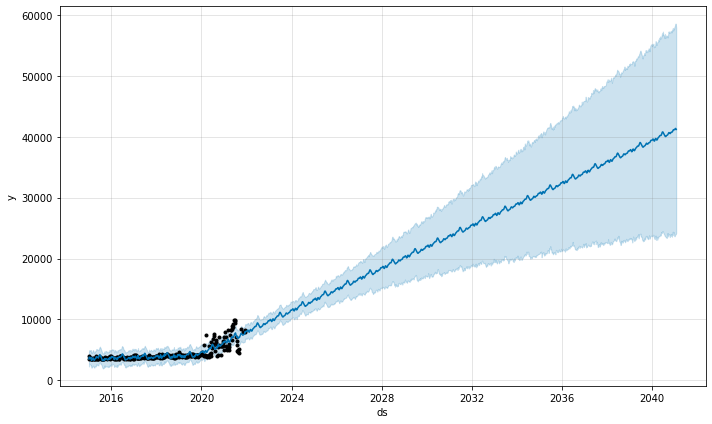

In [ ]:
plot1=m.plot(forecast)
# Como podemos ver en terminos generales a partir del 2020,
# año en el que inicio la pandemia se incrementaron las muertes generales en el paí,
# Y el pronostico es que seguiran aumentando 

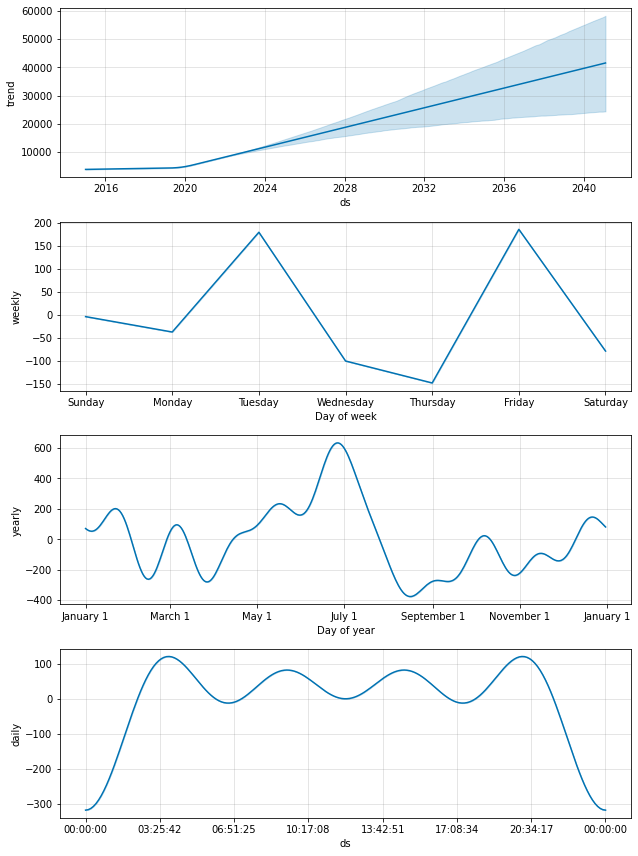

In [ ]:
plot2=m.plot_components(forecast)

# Defunciones Covid Colombia

In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving Defunciones_COVID-19_Colombia.csv to Defunciones_COVID-19_Colombia.csv


In [ ]:
df_DefuncionesCovid=pd.read_csv(io.BytesIO(uploaded['Defunciones_COVID-19_Colombia.csv']),dtype={ 
                                                                'ID de caso':str,
                                                                'Código DIVIPOLA departamento':str,
                                                                'Nombre departamento':str,    
                                                                'Código DIVIPOLA municipio':str,    
                                                                'Nombre municipio':str,         
                                                                'Edad':int,        
                                                                'Unidad de medida de edad':str,     
                                                                'Sexo':str,     
                                                                'Código ISO del país':str,    
                                                                'Nombre del país':str,    
                                                                'Recuperado':str,    
                                                                'Tipo de recuperación':str,       
                                                                'Pertenencia étnica':str,       
                                                                'Nombre del grupo étnico':str
                                                                },low_memory=False)
df_DefuncionesCovid


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,20/3/2020 0:00:00,152,18/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,65,1,M,Importado,Fallecido,Fallecido,840,ESTADOS UNIDOS DE AMÉRICA,Fallecido,10/3/2020 0:00:00,5/4/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6,NaN
1,20/3/2020 0:00:00,153,18/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,53,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,18/3/2020 0:00:00,6/4/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6,NaN
2,20/3/2020 0:00:00,157,20/3/2020 0:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,88,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,12/3/2020 0:00:00,23/3/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6,NaN
3,21/3/2020 0:00:00,188,17/3/2020 0:00:00,76,VALLE,76892,YUMBO,70,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,8/3/2020 0:00:00,22/3/2020 0:00:00,21/3/2020 0:00:00,NaN,NaN,6,NaN
4,16/3/2020 0:00:00,197,13/3/2020 0:00:00,13001,CARTAGENA,13001,CARTAGENA,58,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,6/3/2020 0:00:00,16/3/2020 0:00:00,16/3/2020 0:00:00,NaN,NaN,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126580,8/10/2021 0:00:00,4968505,6/10/2021 0:00:00,11,BOGOTA,11001,BOGOTA,80,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,6/10/2021 0:00:00,7/10/2021 0:00:00,6/10/2021 0:00:00,NaN,NaN,NaN,NaN
126581,8/10/2021 0:00:00,4968535,18/6/2021 0:00:00,76,VALLE,76520,PALMIRA,61,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,12/6/2021 0:00:00,5/7/2021 0:00:00,18/6/2021 0:00:00,NaN,NaN,NaN,NaN
126582,8/10/2021 0:00:00,4968597,6/10/2021 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,96,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,3/10/2021 0:00:00,9/10/2021 0:00:00,7/10/2021 0:00:00,NaN,NaN,NaN,NaN
126583,8/10/2021 0:00:00,4968602,3/10/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,102,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,29/9/2021 0:00:00,3/10/2021 0:00:00,3/10/2021 0:00:00,NaN,NaN,NaN,NaN


In [ ]:
df_MortandadCovid=df_DefuncionesCovid[['Recuperado','Fecha de muerte','Edad']].dropna()
df_MortandadCovid

,Recuperado,Fecha de muerte,Edad
0,Fallecido,5/4/2020 0:00:00,65
1,Fallecido,6/4/2020 0:00:00,53
2,Fallecido,23/3/2020 0:00:00,88
3,Fallecido,22/3/2020 0:00:00,70
4,Fallecido,16/3/2020 0:00:00,58
...,...,...,...
126580,Fallecido,7/10/2021 0:00:00,80
126581,Fallecido,5/7/2021 0:00:00,61
126582,Fallecido,9/10/2021 0:00:00,96
126583,Fallecido,3/10/2021 0:00:00,102


In [ ]:
def fallecidos(fila):
    f=fila['Recuperado']
    if f=='Fallecido' or f=='fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_MortandadCovid.loc[:,'Fallecidos']=df_MortandadCovid.apply(fallecidos,axis=1)
df_MortandadCovid.head()

,Recuperado,Fecha de muerte,Edad,Fallecidos
0,Fallecido,5/4/2020 0:00:00,65,1
1,Fallecido,6/4/2020 0:00:00,53,1
2,Fallecido,23/3/2020 0:00:00,88,1
3,Fallecido,22/3/2020 0:00:00,70,1
4,Fallecido,16/3/2020 0:00:00,58,1


In [ ]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=9:
        resultado="0-9"
        return resultado
    else:
        if decil>=10 and decil<=19:
            resultado="10-19"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="20-29"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="30-39"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="40-49"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="50-59"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="60-69"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="70-79"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="80-89"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=115:
                                            resultado="90+"
                                            return resultado
df_MortandadCovid.loc[:,'Rango_Edad']=df_MortandadCovid.apply(cluster_edad,axis=1)
df_MortandadCovid
#df_defuncion['Rango_Edad']=df_defuncion.apply(cluster_edad,axis=1)


,Recuperado,Fecha de muerte,Edad,Fallecidos,Rango_Edad
0,Fallecido,5/4/2020 0:00:00,65,1,60-69
1,Fallecido,6/4/2020 0:00:00,53,1,50-59
2,Fallecido,23/3/2020 0:00:00,88,1,80-89
3,Fallecido,22/3/2020 0:00:00,70,1,70-79
4,Fallecido,16/3/2020 0:00:00,58,1,50-59
...,...,...,...,...,...
126580,Fallecido,7/10/2021 0:00:00,80,1,80-89
126581,Fallecido,5/7/2021 0:00:00,61,1,60-69
126582,Fallecido,9/10/2021 0:00:00,96,1,90+
126583,Fallecido,3/10/2021 0:00:00,102,1,90+


In [ ]:
df_TotalMortandadCovid=df_MortandadCovid.groupby(by='Fecha de muerte').agg({'Fallecidos':'sum'}).reset_index()
df_TotalMortandadCovid

,Fecha de muerte,Fallecidos
0,1/1/2021 0:00:00,327
1,1/10/2020 0:00:00,177
2,1/10/2021 0:00:00,31
3,1/11/2020 0:00:00,160
4,1/12/2020 0:00:00,172
...,...,...
566,9/7/2021 0:00:00,456
567,9/8/2020 0:00:00,319
568,9/8/2021 0:00:00,165
569,9/9/2020 0:00:00,197


In [ ]:
df_TotalMortandadCovid.loc[:,'DataSeries']=pd.DatetimeIndex(df_TotalMortandadCovid['Fecha de muerte'])
df_TotalMortandadCovid


,Fecha de muerte,Fallecidos,DataSeries
0,1/1/2021 0:00:00,327,2021-01-01
1,1/10/2020 0:00:00,177,2020-01-10
2,1/10/2021 0:00:00,31,2021-01-10
3,1/11/2020 0:00:00,160,2020-01-11
4,1/12/2020 0:00:00,172,2020-01-12
...,...,...,...
566,9/7/2021 0:00:00,456,2021-09-07
567,9/8/2020 0:00:00,319,2020-09-08
568,9/8/2021 0:00:00,165,2021-09-08
569,9/9/2020 0:00:00,197,2020-09-09


In [ ]:
df_PronosticoMortandadCovid=df_TotalMortandadCovid[['Fallecidos','DataSeries']]
df_PronosticoMortandadCovid=df_PronosticoMortandadCovid.rename(columns={'Fallecidos':'y','DataSeries':'ds'})
df_PronosticoMortandadCovid

,y,ds
0,327,2021-01-01
1,177,2020-01-10
2,31,2021-01-10
3,160,2020-01-11
4,172,2020-01-12
...,...,...
566,456,2021-09-07
567,319,2020-09-08
568,165,2021-09-08
569,197,2020-09-09


In [ ]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df_PronosticoMortandadCovid)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=1000,freq='W')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-04,16.978952,-217.205414,352.558592,16.978952,16.978952,41.414458,41.414458,41.414458,51.993899,51.993899,51.993899,-10.579440,-10.579440,-10.579440,0.0,0.0,0.0,58.393410
1,2020-01-05,17.447713,-214.769493,367.435537,17.447713,17.447713,53.149815,53.149815,53.149815,51.993899,51.993899,51.993899,1.155917,1.155917,1.155917,0.0,0.0,0.0,70.597528
2,2020-01-06,17.916474,-212.879230,378.435257,17.916474,17.916474,53.348372,53.348372,53.348372,51.993899,51.993899,51.993899,1.354474,1.354474,1.354474,0.0,0.0,0.0,71.264846
3,2020-01-07,18.385235,-241.168384,353.542934,18.385235,18.385235,51.521788,51.521788,51.521788,51.993899,51.993899,51.993899,-0.472111,-0.472111,-0.472111,0.0,0.0,0.0,69.907023
4,2020-01-08,18.853996,-217.843240,372.156114,18.853996,18.853996,57.994868,57.994868,57.994868,51.993899,51.993899,51.993899,6.000969,6.000969,6.000969,0.0,0.0,0.0,76.848864


In [ ]:
forecast[['ds','trend','yhat']]

,ds,trend,yhat
0,2020-01-04,16.978952,58.393410
1,2020-01-05,17.447713,70.597528
2,2020-01-06,17.916474,71.264846
3,2020-01-07,18.385235,69.907023
4,2020-01-08,18.853996,76.848864
...,...,...,...
1566,2041-01-06,-1092.089600,-1038.939784
1567,2041-01-13,-1093.403109,-1040.253294
1568,2041-01-20,-1094.716618,-1041.566803
1569,2041-01-27,-1096.030127,-1042.880312


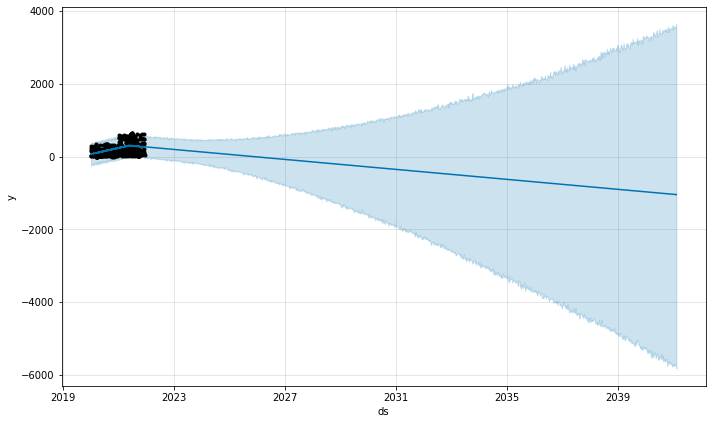

In [55]:
plot3=m.plot(forecast)
# Al igual que en el dataset de los estados unidos vemos una tendencia a la baja de muertes por covid,
# A partir del 2027 tiende a descender a 0
# por lo que es necesario revisar el caso de las comorbilidades  

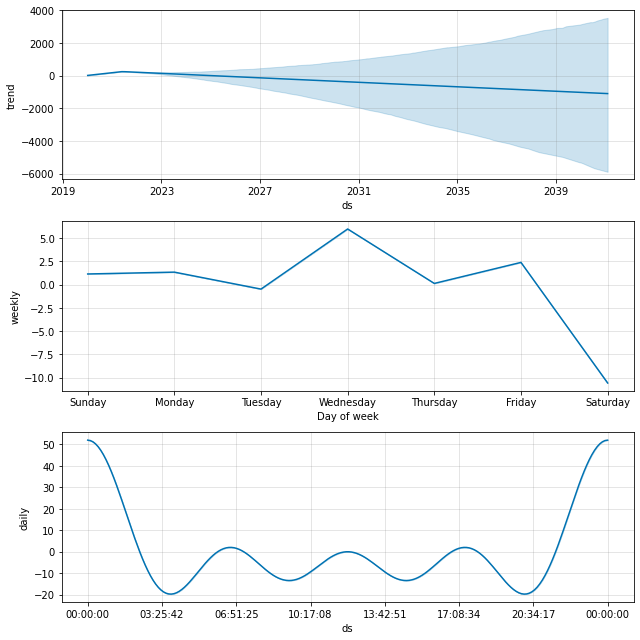

In [56]:
plot4=m.plot_components(forecast)

In [ ]:
# Mortandad Casos covid con comorbilidades

In [58]:
from google.colab import files 
uploaded=files.upload()

Saving ComorbilidadesCovidColombia.csv to ComorbilidadesCovidColombia.csv


In [60]:
df_MortandadComorbilidad=pd.read_csv(io.BytesIO(uploaded['ComorbilidadesCovidColombia.csv']),sep=',',encoding='latin')
df_MortandadComorbilidad


,Edad,CerebroBascular,HTA,DM,Renal,Tiroides,Obesidad,Fumar,Cardiaca,Respiratoria,Cancer,Autoinmune,Vih,Otros,Ninguno,En_estudio,Total_Fallecidos
0,0-9,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49
1,10-19,0,2,2,5,3,3,0,0,4,2,0,1,8,0,18,48
2,20-29,5,22,25,15,6,43,2,12,14,29,14,11,36,4,154,392
3,30-39,13,59,67,40,18,119,1,27,35,45,13,19,38,10,460,964
4,40-49,9,214,231,99,42,304,5,55,58,47,26,28,82,10,1065,2275
5,50-59,38,640,536,290,108,439,27,138,136,158,53,30,160,14,2155,4922
6,60-69,94,1398,1110,554,248,530,59,394,402,255,53,23,297,18,3574,9009
7,70-79,174,1946,1066,635,279,322,59,650,683,296,57,11,380,13,3761,10332
8,80-89,194,1684,710,483,246,141,37,626,837,239,30,5,448,8,2946,8634
9,90+,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342


In [62]:
def tasa_cerbas(fila):
    tasa=(fila['CerebroBascular']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-CerebroBascular']=df_MortandadComorbilidad.apply(tasa_cerbas,axis=1)
df_MortandadComorbilidad


,Edad,CerebroBascular,HTA,DM,Renal,Tiroides,Obesidad,Fumar,Cardiaca,Respiratoria,Cancer,Autoinmune,Vih,Otros,Ninguno,En_estudio,Total_Fallecidos,Tasa_%-CerebroBascular
0,0-9,0,1,1,0,1,1,0,7,1,3,1,1,12,3,17,49,0.000000
1,10-19,0,2,2,5,3,3,0,0,4,2,0,1,8,0,18,48,0.000000
2,20-29,5,22,25,15,6,43,2,12,14,29,14,11,36,4,154,392,1.275510
3,30-39,13,59,67,40,18,119,1,27,35,45,13,19,38,10,460,964,1.348548
4,40-49,9,214,231,99,42,304,5,55,58,47,26,28,82,10,1065,2275,0.395604
5,50-59,38,640,536,290,108,439,27,138,136,158,53,30,160,14,2155,4922,0.772044
6,60-69,94,1398,1110,554,248,530,59,394,402,255,53,23,297,18,3574,9009,1.043401
7,70-79,174,1946,1066,635,279,322,59,650,683,296,57,11,380,13,3761,10332,1.684088
8,80-89,194,1684,710,483,246,141,37,626,837,239,30,5,448,8,2946,8634,2.246931
9,90+,52,494,150,129,71,23,3,190,272,51,7,0,133,3,764,2342,2.220325


In [64]:
def tasa_dm(fila):
    tasa=(fila['DM']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-DiabMellit']=df_MortandadComorbilidad.apply(tasa_dm,axis=1)
#df_MortandadComorbilidad


In [65]:
def tasa_renal(fila):
    tasa=(fila['Renal']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Renal']=df_MortandadComorbilidad.apply(tasa_renal,axis=1)
#df_MortandadComorbilidad


In [66]:
def tasa_tiroide(fila):
    tasa=(fila['Tiroides']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Tiroides']=df_MortandadComorbilidad.apply(tasa_tiroide,axis=1)
#df_MortandadComorbilidad


In [67]:
def tasa_obesidad(fila):
    tasa=(fila['Obesidad']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Obesidad']=df_MortandadComorbilidad.apply(tasa_obesidad,axis=1)
#df_MortandadComorbilidad


In [68]:
def tasa_fumar(fila):
    tasa=(fila['Fumar']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Fumar']=df_MortandadComorbilidad.apply(tasa_fumar,axis=1)
#df_MortandadComorbilidad


In [69]:
def tasa_cardiaca(fila):
    tasa=(fila['Cardiaca']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Cardiaca']=df_MortandadComorbilidad.apply(tasa_cardiaca,axis=1)
#df_MortandadComorbilidad


In [70]:
def tasa_respiratoria(fila):
    tasa=(fila['Respiratoria']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Respiratoria']=df_MortandadComorbilidad.apply(tasa_respiratoria,axis=1)
#df_MortandadComorbilidad


In [71]:
def tasa_cancer(fila):
    tasa=(fila['Cancer']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Cancer']=df_MortandadComorbilidad.apply(tasa_cancer,axis=1)
#df_MortandadComorbilidad


In [72]:
def tasa_autoinmune(fila):
    tasa=(fila['Autoinmune']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Autoinmune']=df_MortandadComorbilidad.apply(tasa_autoinmune,axis=1)
#df_MortandadComorbilidad


In [73]:
def tasa_vih(fila):
    tasa=(fila['Vih']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Vih']=df_MortandadComorbilidad.apply(tasa_vih,axis=1)
#df_MortandadComorbilidad


In [74]:
def tasa_otros(fila):
    tasa=(fila['Otros']/fila['Total_Fallecidos'])#*100 #+str('%')
    return tasa
df_MortandadComorbilidad.loc[:,'Tasa_%-Otros']=df_MortandadComorbilidad.apply(tasa_otros,axis=1)
#df_MortandadComorbilidad


In [118]:
print(df_MortandadComorbilidad['Edad'].describe())
print(df_MortandadCovidTotal['Rango_Edad'].describe()) #.reset_index()

count        10
unique       10
top       80-89
freq          1
Name: Edad, dtype: object
count      4487
unique       10
top       70-79
freq        561
Name: Rango_Edad, dtype: object


In [135]:
df_MortandadCovidTotal=df_MortandadCovid.groupby(by=['Fecha de muerte','Rango_Edad']).agg({'Fallecidos':'sum'}).reset_index()
df_MortandadCovidTotal

,Fecha de muerte,Rango_Edad,Fallecidos
0,1/1/2021 0:00:00,0-9,1
1,1/1/2021 0:00:00,10-19,2
2,1/1/2021 0:00:00,20-29,2
3,1/1/2021 0:00:00,30-39,6
4,1/1/2021 0:00:00,40-49,25
...,...,...,...
4482,9/9/2021 0:00:00,50-59,4
4483,9/9/2021 0:00:00,60-69,10
4484,9/9/2021 0:00:00,70-79,10
4485,9/9/2021 0:00:00,80-89,14
